In [29]:
!date

Sun 20 Mar 2016 19:13:54 GMT


# Code stubs for data analytics exam
Learning outcome
- Analyse and chracterize emprically complex data
- Compute relevant stat quantities and quantify their confidence intervals
- Build sensible models and parameterize and validate these models
- Quantify interdependency and/or casuality structure between variables
- Develope better tools for forecasting

## Topics

- Probability and statistics tools
- Estimation of probability form data
- Extreme events and fat tails
- Prob modelling
---
- Correlations
- Dependencies
- Multivariate statistics
- Information theory
- Causality
---
- Fundamentals on network theory
- Characterizing networks
- Building networks
- Processes on networks
- Information on networks

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import math

# import data
data = pd.read_csv("/Users/VT/Documents/UCL/BUSICS/Data Analytics/GlobalLandTemperatures/GlobalTemperatures.csv")

# data preprocessing
data.dt = pd.to_datetime(data.dt) # correct data type
data = data.dropna(axis=0) # drop rows with NAs
data.iloc[0,:]

dt                                           1850-01-01 00:00:00
LandAverageTemperature                                     0.749
LandAverageTemperatureUncertainty                          1.105
LandMaxTemperature                                         8.242
LandMaxTemperatureUncertainty                              1.738
LandMinTemperature                                        -3.206
LandMinTemperatureUncertainty                              2.822
LandAndOceanAverageTemperature                            12.833
LandAndOceanAverageTemperatureUncertainty                  0.367
Name: 1200, dtype: object

### Basic probability
- #### Stochastic variable
    - whose value is subject to random variations but individual draws are not necessarily independent to each other.
    - We shall call such temperature variation measured over a interval of time, a stochastic variable and we might want to know its probability distribution: the probability that the temperature of this room is within a certain range [T1 , T2].
- #### Random variable
    whose value is subject to variations due to randomness and each draw is independent by the previous, or following, draws (as when tossing a dice). 
- #### Distribution
    - Distribution of log-returns is not normal with larger likelihood of small fluctuations, smaller likelihood of medium range fluctuations and larger likelihood of large fluctuations.

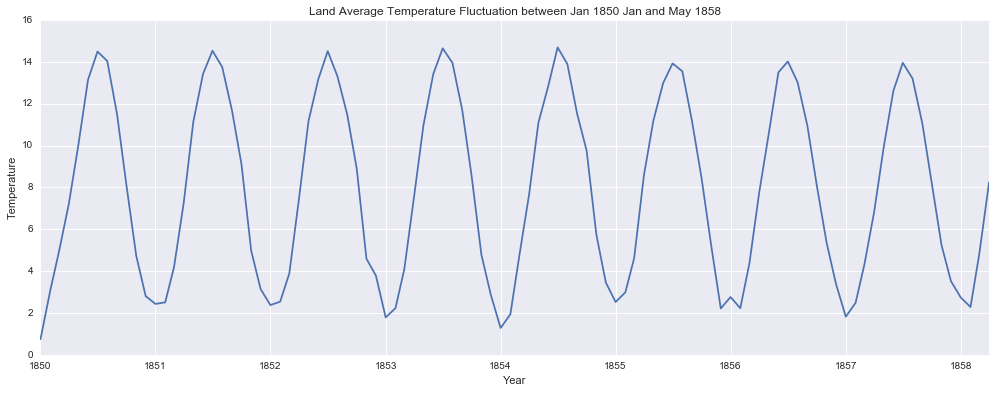

In [63]:
# line chart
plt.figure(num=None, figsize=(17, 6), dpi=180, facecolor='w', edgecolor='k')
plt.plot(data.dt[0:100], data.LandAverageTemperature[0:100])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Land Average Temperature Fluctuation between Jan 1850 Jan and May 1858')
plt.show()

In [88]:
# moments & central moments
fourthMoment = sp.stats.moment(data.LandAverageTemperature, moment=4)
secondMoment = sp.stats.moment(data.LandAverageTemperature, moment=2)
kurtosisManual = (fourthMoment/ math.pow(secondMoment,2))
skewnessManual = sp.stats.moment(data.LandAverageTemperature, moment=3)/np.std(data.LandAverageTemperature)**3

skewness = sp.stats.moment(data.LandAverageTemperature, axis=0)
kurtosis = sp.stats.kurtosis(data.LandAverageTemperature)+3 # stat package calculates excess kurtosis by default

print("Skewness =", skewness)
print("excess kurtosis =", kurtosis - 3)



Skewness = 0.0
excess kurtosis = -1.456481751145552


#### Convergency of samples
<p>Specifically, given a sample of independent (and identically distributed) random variables with a finite mean, the sample mean will eventually approach and stay close to the expected value.</p>
<p>This convergence holds even when the standard deviation is not defined, but the mean must be finite.</p>

#### Independent and identifcally distributed random variables
A collection of random variables $X_1,...,X_N$ is independent and identically distributed (i.i.d.) if each random variable has the same probability distribution of the others and they are all independent from each other.

#### Central limit theorem
The sume of i.d.d variables with finite variance with tend to be normally distributed.

/Users/VT/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


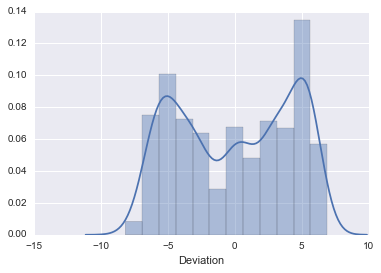

In [148]:
LandTemp = data.copy()
mean = LandTemp.LandAverageTemperature.mean()
LandTemp.insert(1, 'Deviation', np.zeros(len(LandTemp)))
LandTemp['Deviation'] = LandTemp['LandAverageTemperature'] - mean
result = LandTemp.sort(['Deviation'], ascending=True)
result.head()
sns.distplot(result.Deviation)

#### Stable distributions
sum of i.i.d. random variables with non-defined variance

#### Tail
- Thin-tailed
- Fat-tailed
- Bounded distribution

If the distribution has power law tails, a log-log plot will reveal a linear decreasing trend for large fluctuations.

#### Body-tail fitting
The problem is to estimate the x* that best separate the body form the tail. The body and the tail distributions can then be estimated separately by maximum likelihood or other tests.
- $F_{body} (x^*) = F_{tail}(x^*)$

#### Outliers
- An outlier is an observation that is numerically distance from the rest of the data
- Quartiles?

In [73]:
# import 2015 exam data
dataPortfolio = pd.read_csv("/Users/VT/Documents/UCL/BUSICS/Data Analytics/portfolio_cleaned.csv")
dataPortfolio.columns = ['year', 'month', 'day', 'RSW', 'OXIG', 'MGAM', 'HLMA', 'DNO']

dataPortfolio.head()

,year,month,day,RSW,OXIG,MGAM,HLMA,DNO
0,2015,3,4,2544.50,811.30,316.38,706.0,732.24
1,2015,3,3,2540.52,801.35,320.10,698.0,730.28
2,2015,3,2,2587.29,794.38,319.71,713.0,733.22
3,2015,2,27,2597.24,753.07,322.45,712.5,754.30
4,2015,2,26,2635.06,765.01,323.14,716.5,742.04


In [102]:
# rank frequency plot
mean = dataPortfolio['MGAM'].mean()
# split the data set by mean value
dataNeg = dataPortfolio['MGAM'][dataPortfolio['MGAM']< mean]
dataPos = dataPortfolio['MGAM'][dataPortfolio['MGAM'] >= mean]
np.arange(X.size, 0, -1)

array([2972, 2971, 2970, ...,    3,    2,    1])

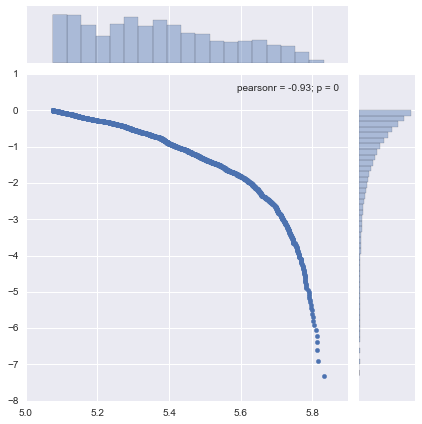

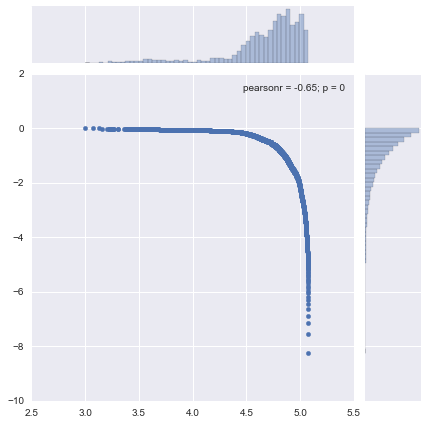

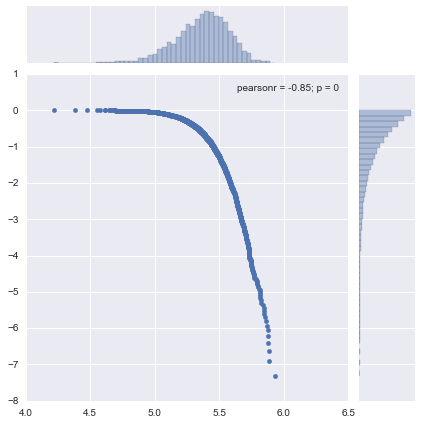

In [128]:
# rank frequency plot
mean = dataPortfolio['MGAM'].mean()
# split the data set by mean value
dataNeg = dataPortfolio['MGAM'][dataPortfolio['MGAM']< mean]
dataPos = dataPortfolio['MGAM'][dataPortfolio['MGAM'] >= mean]

# data > mean
X = np.log(np.sort(dataPos))
Y = np.log(1- (np.arange(X.size)/(X.size+1)))
sns.jointplot(X,Y)

# data < mean
XNeg = np.log(-np.sort(-dataNeg))
YNeg = np.log(1- (np.arange(XNeg.size,0,-1)/(XNeg.size+1)))
sns.jointplot(XNeg,YNeg)

# normal distribution (hypothetical)
Xnormal = np.random.normal(dataPos.mean(), np.std(dataPos), 3000)
Xnormal = np.log(np.sort(Xnormal))
Ynormal = np.log(1- (np.arange(Xnormal.size)/(Xnormal.size+1)))
sns.jointplot(Xnormal,Ynormal)

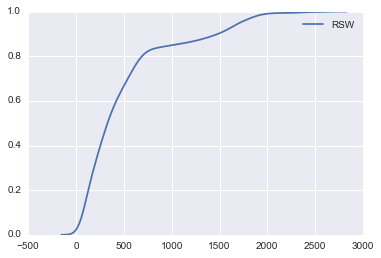

In [38]:
sns.kdeplot(dataPortfolio.RSW, cumulative=True)

# Test and validation

#### p-test
- a sensible way to test an hypothesis is to start from the assumption that it might be wrong and measure how likely one may have obtained the same results from random chance (so-called ***null hypothesis***).
- The p-value is the probability of obtaining observations at least as extreme as the ones actually observed, assuming that the null hypothesis is true.
- Normally the null hypothesis is “rejected” when the p-value is less than a certain significance level, often 0.05 or 0.01.
- This means that the observed result would be highly unlikely under the null hypothesis.
- in-depth
 - http://blog.minitab.com/blog/adventures-in-statistics/understanding-hypothesis-tests%3A-significance-levels-alpha-and-p-values-in-statistics
 - http://blog.minitab.com/blog/adventures-in-statistics/understanding-hypothesis-tests%3A-significance-levels-alpha-and-p-values-in-statistics

In [18]:
dataPortfolio.describe()
dataPortfolio.columns # tricky column names
dataPortfolio.head()

,year,month,day,RSW,OXIG,MGAM,HLMA,DNO
0,2015,3,4,2544.50,811.30,316.38,706.0,732.24
1,2015,3,3,2540.52,801.35,320.10,698.0,730.28
2,2015,3,2,2587.29,794.38,319.71,713.0,733.22
3,2015,2,27,2597.24,753.07,322.45,712.5,754.30
4,2015,2,26,2635.06,765.01,323.14,716.5,742.04


,year,month,day,RSW,OXIG,MGAM,HLMA,DNO
year,1.000000,-0.043102,-0.003238,0.829784,0.642045,0.507337,0.816416,0.843284
month,-0.043102,1.000000,-0.006119,-0.026184,-0.010861,-0.036815,-0.005039,-0.034665
day,-0.003238,-0.006119,1.000000,-0.003876,-0.000042,-0.005850,-0.002316,-0.002060
RSW,0.829784,-0.026184,-0.003876,1.000000,0.896548,0.736502,0.965742,0.968856
OXIG,0.642045,-0.010861,-0.000042,0.896548,1.000000,0.742184,0.910246,0.897473
MGAM,0.507337,-0.036815,-0.005850,0.736502,0.742184,1.000000,0.734705,0.717033
HLMA,0.816416,-0.005039,-0.002316,0.965742,0.910246,0.734705,1.000000,0.967579
DNO,0.843284,-0.034665,-0.002060,0.968856,0.897473,0.717033,0.967579,1.000000


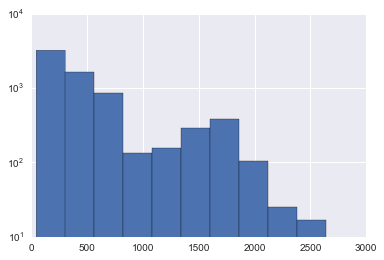

In [10]:
# plotting
plt.hist(dataPortfolio[' RSW'], log=True)
dataPortfolio.corr() # correlation

In [21]:
# Combining datetime columns into 1 variable
pd.to_datetime(dataPortfolio[' day'] + dataPortfolio[' month']*100 + dataPortfolio['year']*10000, format='%Y%m%d')

0      2015-03-04
1      2015-03-03
2      2015-03-02
3      2015-02-27
4      2015-02-26
5      2015-02-25
6      2015-02-24
7      2015-02-23
8      2015-02-20
9      2015-02-19
10     2015-02-18
11     2015-02-17
12     2015-02-16
13     2015-02-13
14     2015-02-12
15     2015-02-11
16     2015-02-10
17     2015-02-09
18     2015-02-06
19     2015-02-05
20     2015-02-04
21     2015-02-03
22     2015-02-02
23     2015-01-30
24     2015-01-29
25     2015-01-28
26     2015-01-27
27     2015-01-26
28     2015-01-23
29     2015-01-22
          ...    
6788   1988-08-11
6789   1988-08-10
6790   1988-08-09
6791   1988-08-08
6792   1988-08-05
6793   1988-08-04
6794   1988-08-03
6795   1988-08-02
6796   1988-08-01
6797   1988-07-29
6798   1988-07-28
6799   1988-07-27
6800   1988-07-26
6801   1988-07-25
6802   1988-07-22
6803   1988-07-21
6804   1988-07-20
6805   1988-07-19
6806   1988-07-18
6807   1988-07-15
6808   1988-07-14
6809   1988-07-13
6810   1988-07-12
6811   1988-07-11
6812   198

              CloseABT  CloseAPPL  CloseBNP  CloseSamsung
CloseABT      1.000000   0.895629  0.341894      0.900140
CloseAPPL     0.895629   1.000000  0.189477      0.930448
CloseBNP      0.341894   0.189477  1.000000      0.341243
CloseSamsung  0.900140   0.930448  0.341243      1.000000
KendalltauResult(correlation=0.76399072760279696, pvalue=0.0)
SpearmanrResult(correlation=0.93407401114651378, pvalue=0.0)
[ 1058.  1052.  1051. ...,  3170.  3174.  3170.]


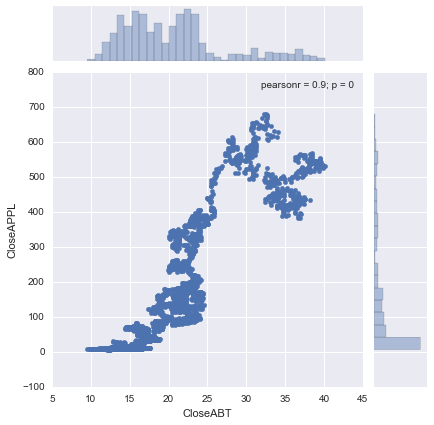

In [6]:
# import portfolio.dat
data2015 = pd.read_csv("/Users/VT/Documents/UCL/BUSICS/Data Analytics/portfolio.csv")
# pearson
sp.stats.pearsonr(data2015['CloseABT'], data2015['CloseAPPL'])
print(data2015.corr())
# kendall
print(sp.stats.kendalltau(data2015['CloseABT'], data2015['CloseAPPL']))
#spearman
print(sp.stats.stats.spearmanr(data2015['CloseABT'], data2015['CloseAPPL']))

# covariance
np.cov(data2015['CloseABT'], data2015['CloseAPPL']) # then the covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i.

# rank plot
rankedABT = sp.stats.stats.rankdata(data2015['CloseABT'])
rankedAPPL = sp.stats.stats.rankdata(data2015['CloseAPPL'])
print(sp.stats.stats.rankdata(data2015['CloseAPPL']))
sns.jointplot(data2015['CloseABT'], data2015['CloseAPPL'], )

#### Kolmogorov-Smirnov test
- measures a distance between the distribution of an empirical sample and a reference ***continuous*** distribution function.
http://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture14.pdf
- This test can be directly extended to verify if two empirical set of observations are drawn from the same probability distribution. In this case the test is called two-sample Kolmogorov-Smirnov test
(in contrast with one-sample Kolmogorov-Smirnov test).
- Kolmogorov-Smirnov test is too ‘tolerant’ and often fails to dismisswrong distributions.

#### Bootstrap
Bootstrap does not improve the estimate of the parameters, it gives an estimate of the error.
1. draw randomly from a set, some elements might be picked more than once
2. repeat step 1, 1000 times or more
3. compute for each set the statitiscal parameters and look at their distribution

#### Jackknife
Resampling by leaving out outliers

# Dependency and casuality

Independence is 
- $p(X=x, Y= y) = p_{x}(X=x)p_{y}(Y=y)$
- $p(X\le x, Y\le y) = p_{x}(X\le x)p_{y}(Y\le y)$

Two stochastic variables with zero correlation coefficient can still be dependent (non-linearly).